<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/KMeansClustering/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_clustering.csv to student_clustering.csv


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/student_clustering.csv')

In [5]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


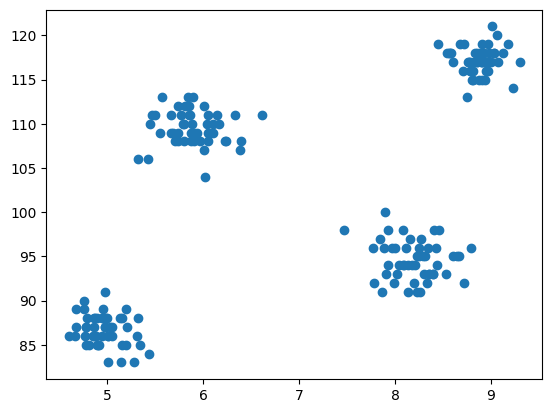

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'])

In [7]:
from sklearn.cluster import KMeans

In [10]:
wcss = [] #create an empty list

for i in range(1, 11): #loop over 1 to 10 so that increasing no. of clusters
  km = KMeans(n_clusters=i) #create a KMeans model with 'i' clusters
  km.fit_predict(df) #fit model and assign each point to a cluster
  wcss.append(km.inertia_) #store the inertia(WCSS) in the list

In [9]:
wcss

[29957.898287999997,
 4184.141269999999,
 2364.0055834200834,
 681.9696600000001,
 587.7764274703555,
 405.1205840691053,
 352.88206083150084,
 243.20066635671452,
 226.14022211087527,
 211.4635480402578]

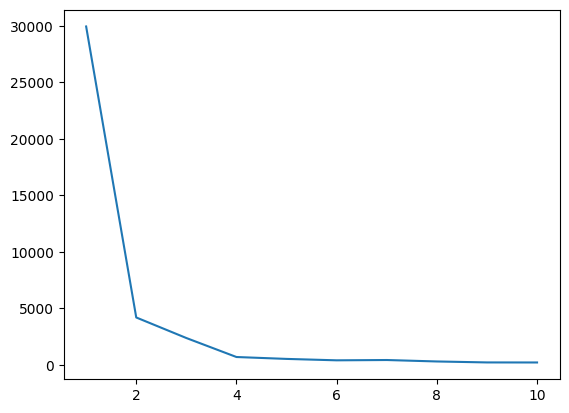

In [11]:
plt.plot(range(1, 11), wcss)

In [15]:
x = df.iloc[:, :].values
km = KMeans(n_clusters=4)
y_km = km.fit_predict(x)

In [16]:
y_km

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0], dtype=int32)

In [22]:
x[y_km == 0, 0]

array([8.8 , 9.18, 8.86, 8.83, 8.56, 8.96, 8.78, 8.45, 8.79, 8.81, 8.88,
       9.07, 8.92, 8.75, 8.71, 8.86, 9.3 , 9.01, 8.97, 9.  , 8.76, 8.78,
       9.23, 9.03, 9.13, 8.91, 8.98, 9.03, 8.86, 8.89, 8.97, 8.72, 8.93,
       8.58, 8.94, 8.6 , 8.77, 8.81, 8.54, 8.97, 8.91, 8.68, 9.06, 8.9 ,
       8.94, 8.91, 8.91, 8.95, 8.57, 8.82])

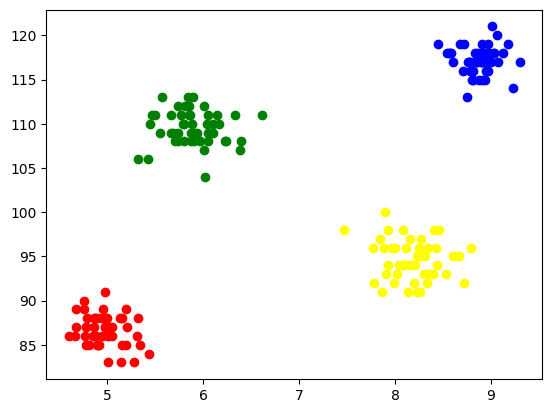

In [24]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], color='blue')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], color='red')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], color='green')
plt.scatter(x[y_km == 3, 0], x[y_km == 3, 1], color='yellow')

K-Means on 3D Data

In [27]:
from sklearn.datasets import make_blobs
centroids = [(-5, -5, 5), (5, 5, -5), (3.5, -2.5, 4), (-2.5, 2.5, -4)]
cluster_std = [1, 1, 1, 1] #standard deviation of each cluster
# it says the cluster is neither tighter nor too scattered

x, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centroids, n_features=3, random_state=1)

In [31]:
import plotly.express as px
fig = px.scatter_3d(x=x[:, 0], y=x[:, 1], z=x[:, 2])
fig.show()

In [32]:
wcss = []

for i in range(1, 11):
  km = KMeans(n_clusters=i)
  km.fit_predict(x)
  wcss.append(km.inertia_)

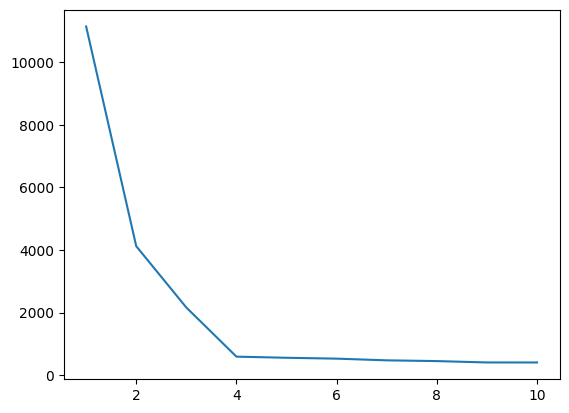

In [33]:
plt.plot(range(1, 11), wcss)

In [34]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(x)

In [35]:
df = pd.DataFrame()

df['col1'] = x[:, 0]
df['col2'] = x[:, 1]
df['col3'] = x[:, 2]

df['label'] = y_pred

In [36]:
fig = px.scatter_3d(df, x='col1', y='col2', z='col3', color='label')
fig.show()